## Models Notebook exercises


***

### Exercise 1
***

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

***
### Exercise 2
***

Fit a straight line to the following data points, using all three methods used in class.

Do you think a straight line is a good model for these points?

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0] </br>
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

In [1]:
# Improting required packages Numpy for numerical multi-dimensional arrays
import numpy as np
# Pyplot for plotting
import matplotlib.pyplot as plt

In [2]:
# Data lists provided:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

# Lists to arrays to avoid "can't multiply sequence by non-int of type 'float'" down the line
x = np.asarray(x)
y = np.asarray(y)

First let's look at the x and y values vithin the plot and guess distribution type.

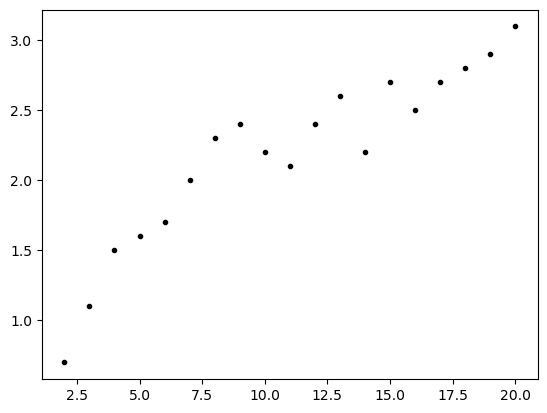

In [3]:
# Plotting given x and y values to see their distribution
plt.plot(x, y, 'k.')
plt.show()

Points seems to belong to linear function with some added noise. Following class example x and y values will be picked to try "guess fit" a few models.

#### Estimated linear functions:
y=0.1x+1 <br>
y=0.125x+0.8 <br>
y=0.2x+0.5

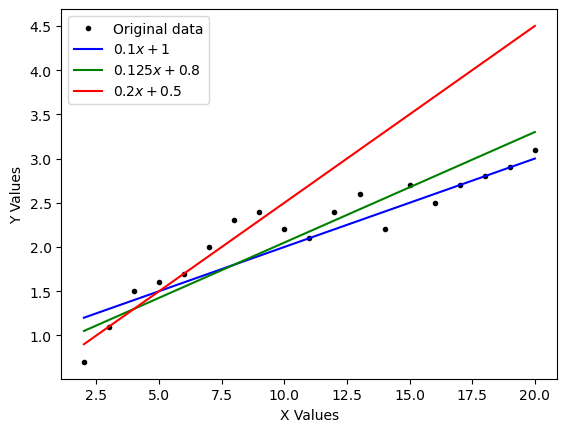

In [4]:
# Plotting x and y values
plt.plot(x, y, 'k.', label="Original data")

# Plotting estimate functions
plt.plot(x, 0.1 * x + 1, 'b-', label=r"$0.1x + 1$")
plt.plot(x, 0.125 * x + 0.8, 'g-', label=r"$0.125x + 0.8$")
plt.plot(x, 0.2 * x + 0.5, 'r-', label=r"$0.2x + 0.5$")

# Adding a legend.
plt.legend()
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

### Cost function fitting

To find best fitting function line, cost function needs to be created that determine m and c values.<br>
Cost function below:

$Cost(m, c) = \sum_i (y_i - mx_i - c)^2$

In [5]:
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 1, cost(0.1, 1)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.125, 0.8, cost(0.125, 0.8)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.2, 0.5, cost(0.2, 0.5)))

Cost with m =  0.10 and c =  1.00:     1.18
Cost with m =  0.12 and c =  0.80:     1.31
Cost with m =  0.20 and c =  0.50:    11.44


To get best fitting the aim is to find the minimum cost function values.

In [6]:
# Trying to find best m and c valuaes

# First x and y mean values are calculated
x_mean = np.mean(x)
y_mean = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_mean
y_zero = y - y_mean

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_mean - m * x_mean

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


Numpy has an integrated function for best cost function values and can be used to confirm found values. [Numpy Polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

In [7]:
# Confirming m and c values with Numpy Polyfit
m_a, c_a = np.polyfit(x,y,1)
m_a, c_a

(0.10315789473684209, 1.0494736842105263)

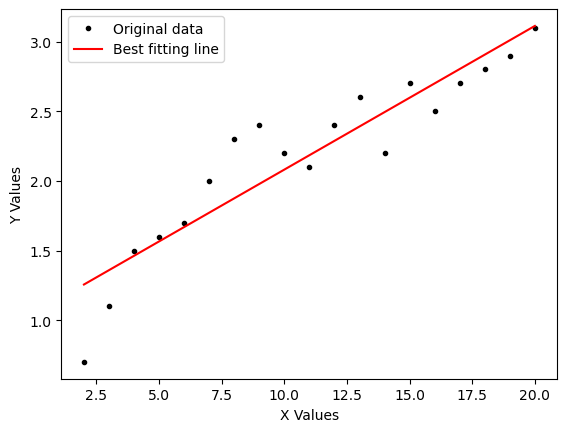

In [8]:
# Plotting original data and best fitted line
plt.plot(x, y, 'k.', label="Original data")
plt.plot(x, m * x + c, 'r-', label='Best fitting line')

# Adding a legend.
plt.legend()
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

### Parameter optimization fitting

Scipy optimisation will be used to estimate parameter of cost function:

$Cost(m, c) = \sum_i (y_i - mx_i - c)^2$

In [9]:
# Importing Scipy Optimization
import scipy.optimize as so

In [10]:
# Data lists provided:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

# Lists to arrays to avoid "can't multiply sequence by non-int of type 'float'" down the line
x = np.asarray(x)
y = np.asarray(y)

In [11]:
# Cost function is declared to minimised by scipy.optimise

# Function can only take one value instead of two: m & c
def cost(MC):
    # m and c values unpacked
    m, c = MC
    # Values are inserted in below functions and result returned
    cost = np.sum((y-m*x-c)**2)
    return cost

In [12]:
# Trying with results from previous method.
cost((0.1,1.0))

1.1799999999999997

**[scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.mini)(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)**

In [13]:
# Applying scipy minimize function
result = so.minimize(cost,(1, 3))
result


      fun: 1.0395789473691144
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([-1.49011612e-08,  2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [14]:
# Extracting and printing optimized m and c values
m_o, c_o = result.x
m_o, c_o

(0.1031578598753655, 1.0494740604614223)

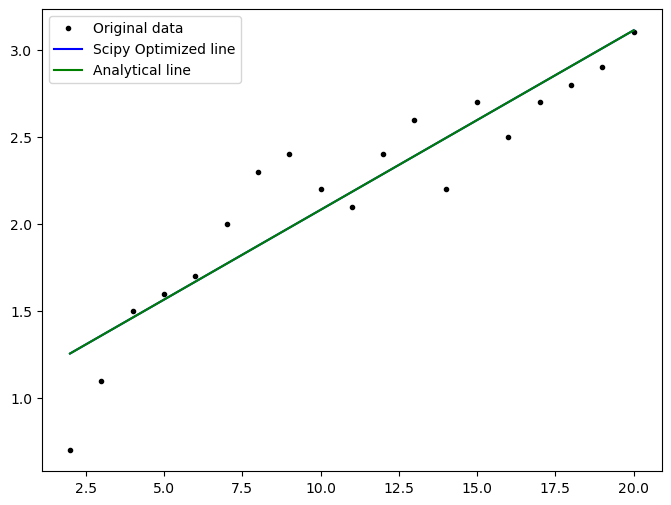

In [15]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Scipy Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')

ax.legend()
plt.show()

### Curve fitting

Scipy Optimise has curve fitting option that will be used as a third method to fit line to x and y values povided. Formula and available parameters are below:

**scipy.optimize.[curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(- inf, inf), method=None, jac=None, \*, full_output=False, \*\*kwargs)**

Firstly model function will be created to be applied in curve fit.

In [16]:
# Model function
def f(x, m, c):
    return m * x + c

In [17]:
# Applying it in curve_fit function
result = so.curve_fit(f, x, y)
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [18]:
# Extracting parameter values
m_f, c_f = result[0]
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

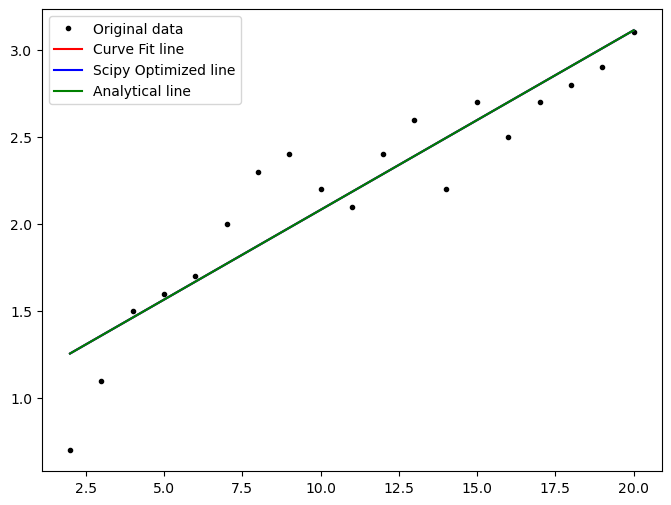

In [19]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_o * x + c_o, 'b-', label='Scipy Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')

ax.legend()
plt.show()

References:<br>
https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb<br>

# The end.